In [2]:
from tslearn.utils import to_time_series
my_first_time_series=[1,3,4,2]
formatted_time_series=to_time_series(my_first_time_series)
print(formatted_time_series)
print(formatted_time_series.__class__)
print(formatted_time_series.shape)

#在 tslearn中 时间序列是一个二维numpy数组

[[1.]
 [3.]
 [4.]
 [2.]]
<class 'numpy.ndarray'>
(4, 1)


In [5]:
from tslearn.utils import to_time_series_dataset
my_first_time_series=[1,3,4,2]
my_second_time_series=[1,2,4,2]
formatted_dataset=to_time_series_dataset([my_first_time_series,my_second_time_series])
print(formatted_dataset.__class__)
print(formatted_dataset)
print('-'*20)

my_third_time_series=[1,2,4,2,2]
formatted_dataset=to_time_series_dataset([my_first_time_series,my_second_time_series,my_third_time_series])
print(formatted_dataset)

#时间序列集，在tslearn中就是多个numpy数组

<class 'numpy.ndarray'>
[[[1.]
  [3.]
  [4.]
  [2.]]

 [[1.]
  [2.]
  [4.]
  [2.]]]
--------------------
[[[ 1.]
  [ 3.]
  [ 4.]
  [ 2.]
  [nan]]

 [[ 1.]
  [ 2.]
  [ 4.]
  [ 2.]
  [nan]]

 [[ 1.]
  [ 2.]
  [ 4.]
  [ 2.]
  [ 2.]]]


In [12]:
#导入标准时间序列数据集
from tslearn.datasets import UCR_UEA_datasets
X_train,y_train,X_text,y_test=UCR_UEA_datasets().load_dataset("TwoPatterns")
print(X_train)
# print(X_tarin.__class__)
# print(X_train.shape)
print(y_train.shape)

[[[ 0.2303793 ]
  [ 0.49096649]
  [ 0.35883306]
  ...
  [ 0.21074476]
  [-0.25542933]
  [-0.27894241]]

 [[ 0.00076522]
  [-0.34267997]
  [ 0.18872921]
  ...
  [-0.64269981]
  [-0.12149454]
  [ 0.52589527]]

 [[ 0.17044215]
  [-0.01886377]
  [ 0.4024516 ]
  ...
  [-0.22051709]
  [ 0.25796549]
  [ 0.66266508]]

 ...

 [[-0.35998444]
  [ 0.22577919]
  [ 0.01796405]
  ...
  [ 0.37429672]
  [ 0.4160218 ]
  [-0.27336748]]

 [[ 0.24685978]
  [-0.33697087]
  [-0.3712872 ]
  ...
  [ 0.0684051 ]
  [ 0.09142212]
  [ 0.42766655]]

 [[-0.31033582]
  [-0.24524647]
  [-0.30000574]
  ...
  [ 0.3907156 ]
  [-0.15506771]
  [ 0.6423072 ]]]
(1000,)


In [18]:
#读取和保存序列
from tslearn.utils import save_time_series_txt, load_time_series_txt
time_series_dataset = load_time_series_txt("dataset/file.txt")
print(time_series_dataset)

dataset_to_be_saved=formatted_dataset
save_time_series_txt("dataset/file2.txt",dataset_to_be_saved)

[[[1.    3.   ]
  [0.    2.   ]
  [2.5   1.   ]]

 [[1.    4.333]
  [2.    2.12 ]
  [  nan   nan]]]


In [25]:
'''
提供标准的数据集后，直接调用API进行学习。
大多数tslearn模型都继承自基scikit-learn类，因此与它们的交互与与scikit-learn模型的交互非常相似
只是数据集不是二维数组，而是 tslearn时间序列数据集（即三维数组或二维数组列表）。

'''
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")

km.fit(X_train)

TimeSeriesKMeans(metric='dtw')

In [ ]:
from tslearn.utils import to_time_series_dataset
X=to_time_series_dataset([[1,2,3,4],[1,2,3],[2,5,6,7,8,9]])
y=[0,0,1]

# 分类
- KNeighborsTimeSeriesClassifier
- TimeSeriesSVC
- LearningShapelets

In [28]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
knn = KNeighborsTimeSeriesClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsTimeSeriesClassifier(n_neighbors=2)

In [32]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(X, y)

TimeSeriesSVC()

In [31]:
from tslearn.shapelets import LearningShapelets
clf = LearningShapelets(n_shapelets_per_size={3: 1})
clf.fit(X, y)

D:\Anaconda3\envs\ts\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


LearningShapelets(n_shapelets_per_size={3: 1})

# 回归
- TimeSeriesSVR

In [37]:
from tslearn.svm import TimeSeriesSVR
clf = TimeSeriesSVR(C=1.0, kernel="gak")
y_reg = [1.3, 5.2, -12.2]
clf.fit(X, y_reg)

TimeSeriesSVR()

# 最近邻搜索
- KNeighborsTimeSeries

In [41]:
from tslearn.neighbors import KNeighborsTimeSeries
knn = KNeighborsTimeSeries(n_neighbors=2)
knn.fit(X)
knn.kneighbors(X)    # Search for neighbors using series from `X` as queries


(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 7.54983444]]),
 array([[0, 1],
        [1, 0],
        [2, 0]], dtype=int64))

# 聚类
- KernelKMeans
- TimeSeriesKMeans
- silhouette_score

In [44]:
from tslearn.clustering import KernelKMeans
gak_km = KernelKMeans(n_clusters=2, kernel="gak")
labels_gak = gak_km.fit_predict(X)
print(labels_gak)

[1 0 0]


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=2, metric="dtw")
labels = km.fit_predict(X)
km_bis = TimeSeriesKMeans(n_clusters=2, metric="softdtw")
labels_bis = km_bis.fit_predict(X)
print(labels_bis)

In [51]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
km = TimeSeriesKMeans(n_clusters=2, metric="dtw")
labels = km.fit_predict(X)
a=silhouette_score(X, labels, metric="dtw")
print(a)

0.5875727602071013


# 重心计算
- dtw_barycenter_averaging
- softdtw_barycenter

In [57]:
from tslearn.barycenters import dtw_barycenter_averaging
bar = dtw_barycenter_averaging(X, barycenter_size=3)
print(bar)

[[1.6       ]
 [3.66666667]
 [6.16666667]]


In [59]:
from tslearn.barycenters import softdtw_barycenter
from tslearn.utils import ts_zeros
initial_barycenter = ts_zeros(sz=5)
bar = softdtw_barycenter(X, init=initial_barycenter)
print(bar)

[[1.43285296]
 [1.81428019]
 [2.18330999]
 [2.59166564]
 [6.00551344]]


D:\Anaconda3\envs\ts\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])


# 模型选择
此外，由 scikit-learn 提供的模型选择工具scikit-learn可以以标准方式用于可变长度数据

In [61]:
from sklearn.model_selection import KFold, GridSearchCV
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

knn = KNeighborsTimeSeriesClassifier(metric="dtw")
p_grid = {"n_neighbors": [1, 5]}

cv = KFold(n_splits=2, shuffle=True, random_state=0)
clf = GridSearchCV(estimator=knn, param_grid=p_grid, cv=cv)
clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=KNeighborsTimeSeriesClassifier(),
             param_grid={'n_neighbors': [1, 5]})

# 重采样
- TimeSeriesResampler

In [62]:
from tslearn.preprocessing import TimeSeriesResampler

resampled_X = TimeSeriesResampler(sz=X.shape[1]).fit_transform(X)
print(resampled_X)

[[[1. ]
  [1.6]
  [2.2]
  [2.8]
  [3.4]
  [4. ]]

 [[1. ]
  [1.4]
  [1.8]
  [2.2]
  [2.6]
  [3. ]]

 [[2. ]
  [5. ]
  [6. ]
  [7. ]
  [8. ]
  [9. ]]]


In [65]:
# tslearn.barycenters	该tslearn.barycenters模块收集用于时间序列重心计算的算法。
# tslearn.clustering	该tslearn.clustering模块收集时间序列特定的聚类算法。
# tslearn.datasets	    该tslearn.datasets模块提供对标准时间序列数据集的简化访问。
# tslearn.early_classification	该tslearn.early_classification模块收集时间序列的早期分类器。
# tslearn.generators	该tslearn.generators模块收集合成时间序列数据集生成例程。
# tslearn.matrix_profile该tslearn.matrix_profile模块收集用于从时间序列计算矩阵配置文件的方法。
# tslearn.metrics	    该tslearn.metrics模块提供用于机器学习算法核心的时间序列特定指标。
# tslearn.neural_network该tslearn.neural_network模块包含用于时间序列分类和回归的多层感知器模型。
# tslearn.neighbors	    该tslearn.neighbors模块使用时间序列指标收集最近邻算法。
# tslearn.piecewise	    该tslearn.piecewise模块收集时间序列分段逼近算法。
# tslearn.preprocessing	该tslearn.preprocessing模块收集时间序列缩放器和重采样器。
# tslearn.shapelets	    该tslearn.shapelets模块收集基于 Shapelet 的算法。
# tslearn.svm	        该tslearn.svm模块包含时间序列的支持向量分类器 (SVC) 和支持向量回归器 (SVR) 模型。
# tslearn.utils	        该tslearn.utils模块包括各种实用程序

股票名称 ['粤桂股份']


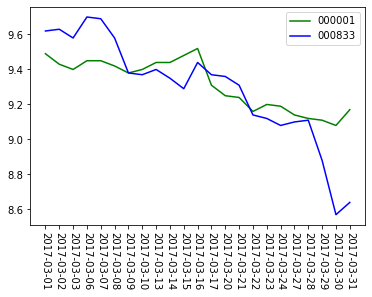

In [13]:
import akshare as ak
import pandas as pd
import numpy as np
import tslearn
import tslearn.metrics

stock_zh_a_spot_em_df = ak.stock_zh_a_spot_em()
stock_zh_a_spot_em_df_symbol=stock_zh_a_spot_em_df["代码"]
def get_name_from_symbol(num):
    if num is not str:
        num = str(num) # 数字转化为字符串        
    num = num.zfill(6) # 字符串右对齐补0
    name=stock_zh_a_spot_em_df[stock_zh_a_spot_em_df_symbol==num]["名称"]
    return name.values


#取出被比较的数据
master_symbol="000001"
stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=master_symbol, period="daily", start_date="20170301", end_date='20170401', adjust="")
choose_df_master=stock_zh_a_hist_df

#批量取出比较的数据
dataset=[]
#全部取取不动，先取10个
start=0
n=300
for symbol in stock_zh_a_spot_em_df_symbol[start:n]:
    choose_df=ak.stock_zh_a_hist(symbol=symbol, period="daily", start_date="20170301", end_date='20170401', adjust="")
    
    choose_df=[choose_df,symbol]
    dataset.append(choose_df)
    
all_values=[]
for i in range(len(np.arange(start,n))):
    dtw_value=tslearn.metrics.dtw(choose_df_master["收盘"], dataset[i][0]["收盘"])
    #dtw有inf的，查了一下是空值，只有股票编码，没有数值的
    all_values.append([dtw_value,dataset[i][0],dataset[i][1]])
    
# dtw_all=[x[0] for x in all_values]  #dtw的值

#按第一列的  dtw值  列排序
out_data = sorted(all_values, key = lambda x:x[0])

target=out_data[0]

#画图
import matplotlib.pyplot as plt

plt.xticks(rotation=270)
plt.plot(choose_df_master["日期"],choose_df_master["收盘"] , color='green', label=master_symbol)
plt.plot(target[1]["日期"],target[1]["收盘"] , color='blue', label=target[2])
name=get_name_from_symbol(target[2])
print("股票名称",name)
plt.legend()
plt.show()